## 3D plot of Haldane bands

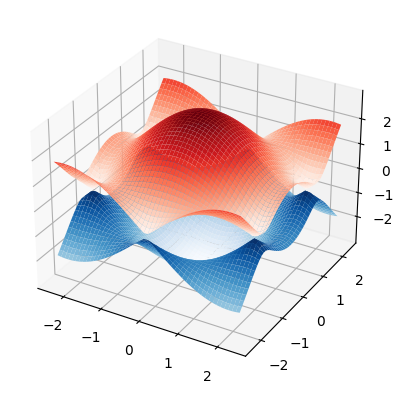

In [1]:
"""
Created on Mon Sep 25 13:33:47 2023
@author: yucheng
"""

import numpy as np
import math
from numpy import linalg as LA
import matplotlib.pyplot as plt

def pauli():
    # define puali matrices
    s_0=np.identity(2)
    s_z=np.array([[1,0],[0,-1]])
    s_x=np.array([[0,1],[1,0]])
    s_y=np.array([[0,-1j],[1j,0]])
    return s_0, s_x, s_y, s_z

## Build a function that takes in Hamiltonian and gives GS energy
def GS_E(H):
    eigen_val, eigen_vec = LA.eig(H)
    #  sorted enumerate produce (original index, value) in sorted order
    sorted_val = sorted(enumerate(eigen_val), key=lambda i: i[1])
    return sorted_val[0][1]

## Build a function that takes in Hamiltonian and gives excited state energy
def ES_E(H):
    eigen_val, eigen_vec = LA.eig(H)
    #  sorted enumerate produce (original index, value) in sorted order
    sorted_val = sorted(enumerate(eigen_val), key=lambda i: i[1])
    return sorted_val[1][1]

## Haldane model in momentum space
#  lattice constant and the nnn hopping phase is set to unity
def Haldane(k, M, t1, t2, phi):
    # nearest neighbor displacement
    e1 = np.array([0,1])
    e2 = 0.5*np.array([-1*3**0.5, -1])
    e3 = 0.5*np.array([3**0.5, -1])
    # next nearest neighbor displacement
    v1 = np.array([-1*3**0.5, 0])
    v2 = 0.5*np.array([3**0.5, -3])
    v3 = 0.5*np.array([3**0.5, 3])
    f0 = 2*t2*math.cos(phi)*(np.cos(np.dot(k, v1)) + np.cos(np.dot(k, v2)) + np.cos(np.dot(k, v3)))
    f1 = t1*(np.cos(np.dot(k,e1)) + np.cos(np.dot(k,e2)) + np.cos(np.dot(k,e3)))
    f2 = t1*(np.sin(np.dot(k,e1)) + np.sin(np.dot(k,e2)) + np.sin(np.dot(k,e3)))
    f3 = M - 2*t2*np.sin(phi)*(np.sin(np.dot(k,v1)) + np.sin(np.dot(k,v2)) + np.sin(np.dot(k,v3)))
    s_0, s_x, s_y, s_z = pauli()
    return s_0*f0 + s_x*f1 + s_y*f2 + s_z*f3

def f123(k, M, t1, t2, phi):
    # nearest neighbor displacement
    e1 = np.array([0,1])
    e2 = 0.5*np.array([-1*3**0.5, -1])
    e3 = 0.5*np.array([3**0.5, -1])
    # next nearest neighbor displacement
    v1 = np.array([-1*3**0.5, 0])
    v2 = 0.5*np.array([3**0.5, -3])
    v3 = 0.5*np.array([3**0.5, 3])
    f1 = t1*(np.cos(np.dot(k,e1)) + np.cos(np.dot(k,e2)) + np.cos(np.dot(k,e3)))
    f2 = t1*(np.sin(np.dot(k,e1)) + np.sin(np.dot(k,e2)) + np.sin(np.dot(k,e3)))
    f3 = M - 2*t2*np.sin(phi)*(np.sin(np.dot(k,v1)) + np.sin(np.dot(k,v2)) + np.sin(np.dot(k,v3)))
    return f1, f2, f3

## Set Haldane parameters
M, t1, t2, phi = 0, 1, 0, np.pi*0.5

## Plot 3D bands on 2D BZ
kx = np.linspace(-0.75*np.pi, 0.75*np.pi, 50)
ky = np.linspace(-0.75*np.pi, 0.75*np.pi, 50)
grid_kx, grid_ky = np.meshgrid(kx, ky)
E_low, E_up = np.zeros((len(kx), len(ky))), np.zeros((len(kx), len(ky)))
for i in range(len(kx)):
    for j in range(len(ky)):
        # E[i][j] = GS_E(Haldane(np.array([kx[i], ky[j]]), M, t1, t2, phi))
        f1, f2, f3 = f123(np.array([kx[i], ky[j]]), M, t1, t2, phi)
        E_low[i][j] = -1 * (f1**2 + f2**2 + f3**2)**0.5
        E_up[i][j] = (f1**2 + f2**2 + f3**2)**0.5

ax = plt.axes(projection='3d')
ax.plot_surface(grid_kx, grid_ky, E_low, rstride=1, cstride=1,
                cmap='Blues', edgecolor='none')
ax.plot_surface(grid_kx, grid_ky, E_up, rstride=1, cstride=1,
                cmap='Reds', edgecolor='none')

Questions:

1. Does the nnn hopping phase $e^{\pm i\phi}$ play any role? Because the topocondmat website seems to set it to $1$ for the whole discussion.
2. Should I also plot bands along ex. $\Gamma$--$K$--$M$--$K'$--$\Gamma$ ?

## Band along high symmetry line

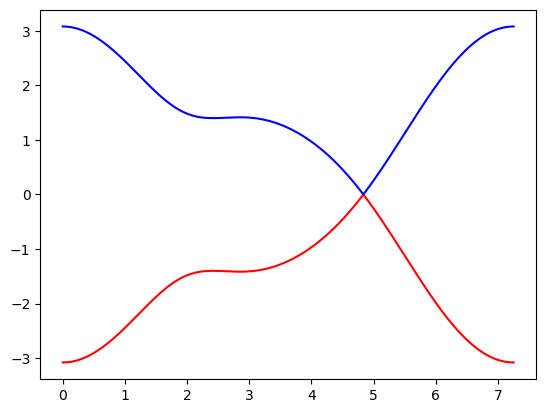

In [1]:
"""
Created on Tue Sep 26 20:39:08 2023
@author: yucheng
"""

import numpy as np
import math
from numpy import linalg as LA
import matplotlib.pyplot as plt

def pauli():
    # define puali matrices
    s_0=np.identity(2)
    s_z=np.array([[1,0],[0,-1]])
    s_x=np.array([[0,1],[1,0]])
    s_y=np.array([[0,-1j],[1j,0]])
    return s_0, s_x, s_y, s_z

## Build a function that takes in Hamiltonian and gives GS energy
def GS_E(H):
    eigen_val, eigen_vec = LA.eig(H)
    #  sorted enumerate produce (original index, value) in sorted order
    sorted_val = sorted(enumerate(eigen_val), key=lambda i: i[1])
    return sorted_val[0][1]

## Build a function that takes in Hamiltonian and gives excited state energy
def ES_E(H):
    eigen_val, eigen_vec = LA.eig(H)
    #  sorted enumerate produce (original index, value) in sorted order
    sorted_val = sorted(enumerate(eigen_val), key=lambda i: i[1])
    return sorted_val[1][1]

## Haldane model in momentum space
#  lattice constant and the nnn hopping phase is set to unity
def Haldane(k, M, t1, t2, phi):
    # nearest neighbor displacement
    e1 = np.array([0,1])
    e2 = 0.5*np.array([-1*3**0.5, -1])
    e3 = 0.5*np.array([3**0.5, -1])
    # next nearest neighbor displacement
    v1 = np.array([-1*3**0.5, 0])
    v2 = 0.5*np.array([3**0.5, -3])
    v3 = 0.5*np.array([3**0.5, 3])
    f0 = 2*t2*math.cos(phi)*(np.cos(np.dot(k, v1)) + np.cos(np.dot(k, v2)) + np.cos(np.dot(k, v3)))
    f1 = t1*(np.cos(np.dot(k,e1)) + np.cos(np.dot(k,e2)) + np.cos(np.dot(k,e3)))
    f2 = t1*(np.sin(np.dot(k,e1)) + np.sin(np.dot(k,e2)) + np.sin(np.dot(k,e3)))
    f3 = M - 2*t2*np.sin(phi)*(np.sin(np.dot(k,v1)) + np.sin(np.dot(k,v2)) + np.sin(np.dot(k,v3)))
    s_0, s_x, s_y, s_z = pauli()
    return s_0*f0 + s_x*f1 + s_y*f2 + s_z*f3

def f123(k, M, t1, t2, phi):
    # nearest neighbor displacement
    e1 = np.array([0,1])
    e2 = 0.5*np.array([-1*3**0.5, -1])
    e3 = 0.5*np.array([3**0.5, -1])
    # next nearest neighbor displacement
    v1 = np.array([-1*3**0.5, 0])
    v2 = 0.5*np.array([3**0.5, -3])
    v3 = 0.5*np.array([3**0.5, 3])
    f1 = t1*(np.cos(np.dot(k,e1)) + np.cos(np.dot(k,e2)) + np.cos(np.dot(k,e3)))
    f2 = t1*(np.sin(np.dot(k,e1)) + np.sin(np.dot(k,e2)) + np.sin(np.dot(k,e3)))
    f3 = M - 2*t2*np.sin(phi)*(np.sin(np.dot(k,v1)) + np.sin(np.dot(k,v2)) + np.sin(np.dot(k,v3)))
    return f1, f2, f3

def num_k(base, start, end):  #start & end should be 2x1 (numpy) array in [kx,ky]
    dis = ((end[0] - start[0])**2 + (end[1] - start[1])**2)**0.5
    ref_dis = 4*np.pi/(3*3**0.5)
    return int(base * dis / ref_dis)

def dis(start, end):
    return ((end[0] - start[0])**2 + (end[1] - start[1])**2)**0.5

## Set Haldane parameters
M, t1, t2, phi = 0.7, -1, -0.1347, np.pi*0.5

## Plot bands along high symmetry line in BZ
base = 50

kpt = num_k(base, [0, 0], [4*3**0.5*np.pi/9, 0])
kx_GK = np.linspace(0, 4*3**0.5*np.pi/9, kpt)
ky_GK = np.linspace(0, 0, kpt)

kpt = num_k(base, [4*3**0.5*np.pi/9, 0], [3**0.5*np.pi/3, np.pi/3])
kx_KM = np.linspace(4*3**0.5*np.pi/9, 3**0.5*np.pi/3, kpt)
ky_KM = np.linspace(0, np.pi/3, kpt)

kpt = num_k(base, [3**0.5*np.pi/3, np.pi/3], [2*3**0.5*np.pi/9, 2*np.pi/3])
kx_MKP = np.linspace(3**0.5*np.pi/3, 2*3**0.5*np.pi/9, 50)
ky_MKP = np.linspace(np.pi/3, 2*np.pi/3, 50)

kpt = num_k(base, [2*3**0.5*np.pi/9, 2*np.pi/3], [0, 0])
kx_KPG = np.linspace(2*3**0.5*np.pi/9, 0, 50)
ky_KPG = np.linspace(2*np.pi/3, 0, 50)

args = (kx_GK, kx_KM, kx_MKP, kx_KPG)
kx = np.concatenate(args)
args = (ky_GK, ky_KM, ky_MKP, ky_KPG)
ky = np.concatenate(args)
#grid_kx, grid_ky = np.meshgrid(kx, ky)
E_low, E_up = np.zeros(len(kx)), np.zeros(len(kx))
k_dis = np.zeros(len(kx))
for i in range(len(kx)):
    f1, f2, f3 = f123(np.array([kx[i], ky[i]]), M, t1, t2, phi)
    E_low[i] = -1 * (f1**2 + f2**2 + f3**2)**0.5
    E_up[i] = (f1**2 + f2**2 + f3**2)**0.5
    if i > 0:
        k_dis[i] = k_dis[i-1] + dis([kx[i], ky[i]], [kx[i-1], ky[i-1]])

plt.plot(k_dis, E_low, 'r')
plt.plot(k_dis, E_up, 'b')

Another practice I can do is:

> Calculate the characters on $K'$ for both bands across topological phase transition

They should be pure site 1 (site 2). This way, we could really see the inversion of band.

## Chern number calculation

k-grid= 50x50
--- 19.828673124313354 seconds ---


Text(0, 0.5, 'Chern number')

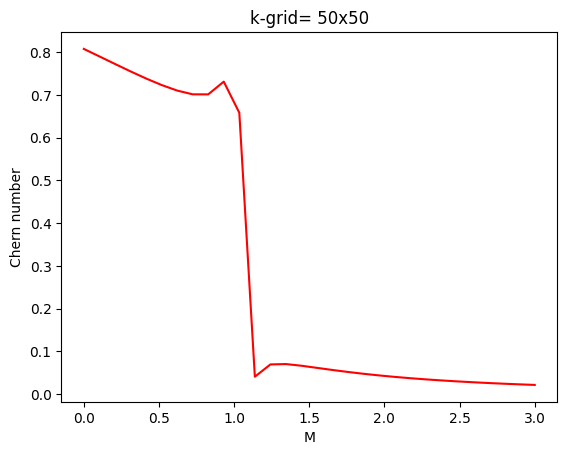

In [1]:
"""
Created on Mon Sep 25 15:53:49 2023
@author: yucheng
"""

import numpy as np
import math
from numpy import linalg as LA
import matplotlib.pyplot as plt
import time

start_time = time.time()

def pauli():
    # define puali matrices
    s_0=np.identity(2)
    s_z=np.array([[1,0],[0,-1]])
    s_x=np.array([[0,1],[1,0]])
    s_y=np.array([[0,-1j],[1j,0]])
    return s_0, s_x, s_y, s_z

## Build a function that takes in Hamiltonian and gives GS energy
def GS_E(H):
    eigen_val, eigen_vec = LA.eig(H)
    #  sorted enumerate produce (original index, value) in sorted order
    sorted_val = sorted(enumerate(eigen_val), key=lambda i: i[1])
    return sorted_val[0][1]

## Build a function that takes in Hamiltonian and gives excited state energy
def ES_E(H):
    eigen_val, eigen_vec = LA.eig(H)
    #  sorted enumerate produce (original index, value) in sorted order
    sorted_val = sorted(enumerate(eigen_val), key=lambda i: i[1])
    return sorted_val[1][1]

## Haldane model in momentum space
#  lattice constant and the nnn hopping phase is set to unity
def Haldane(k, M, t1, t2, phi):
    # nearest neighbor displacement
    e1 = np.array([0,1])
    e2 = 0.5*np.array([-1*3**0.5, -1])
    e3 = 0.5*np.array([3**0.5, -1])
    # next nearest neighbor displacement
    v1 = np.array([-1*3**0.5, 0])
    v2 = 0.5*np.array([3**0.5, -3])
    v3 = 0.5*np.array([3**0.5, 3])
    f0 = 2*t2*math.cos(phi)*(np.cos(np.dot(k, v1)) + np.cos(np.dot(k, v2)) + np.cos(np.dot(k, v3)))
    f1 = t1*(np.cos(np.dot(k,e1)) + np.cos(np.dot(k,e2)) + np.cos(np.dot(k,e3)))
    f2 = t1*(np.sin(np.dot(k,e1)) + np.sin(np.dot(k,e2)) + np.sin(np.dot(k,e3)))
    f3 = M - 2*t2*np.sin(phi)*(np.sin(np.dot(k,v1)) + np.sin(np.dot(k,v2)) + np.sin(np.dot(k,v3)))
    s_0, s_x, s_y, s_z = pauli()
    return s_0*f0 + s_x*f1 + s_y*f2 + s_z*f3

def f123(k, M, t1, t2, phi):
    # nearest neighbor displacement
    e1 = np.array([0,1])
    e2 = 0.5*np.array([-1*3**0.5, -1])
    e3 = 0.5*np.array([3**0.5, -1])
    # next nearest neighbor displacement
    v1 = np.array([-1*3**0.5, 0])
    v2 = 0.5*np.array([3**0.5, -3])
    v3 = 0.5*np.array([3**0.5, 3])
    f1 = t1*(np.cos(np.dot(k,e1)) + np.cos(np.dot(k,e2)) + np.cos(np.dot(k,e3)))
    f2 = t1*(np.sin(np.dot(k,e1)) + np.sin(np.dot(k,e2)) + np.sin(np.dot(k,e3)))
    f3 = M - 2*t2*np.sin(phi)*(np.sin(np.dot(k,v1)) + np.sin(np.dot(k,v2)) + np.sin(np.dot(k,v3)))
    return f1, f2, f3

def Chern(M, t1, t2, phi, kx_list, ky_list):
    dkx = kx_list[1] - kx_list[0]
    dky = ky_list[1] - ky_list[0]
    chern = 0
    for i in range(len(kx_list) - 1):  # -1 because we need to take kx_list[i+1] - kx_list[i]
        for j in range(len(ky_list) - 1):
            f1, f2, f3 = f123(np.array([kx_list[i], ky_list[j]]), M, t1, t2, phi)
            # f1_xa = the advanced f1 along kx direction = the f1 value on the (i+1)-th kx grid
            f1_xa, f2_xa, f3_xa = f123(np.array([kx_list[i+1], ky_list[j]]), M, t1, t2, phi)
            f1_ya, f2_ya, f3_ya = f123(np.array([kx_list[i], ky_list[j+1]]), M, t1, t2, phi)
            # calculate derivatives
            pf1pkx = (f1_xa - f1) / dkx
            pf2pkx = (f2_xa - f2) / dkx
            pf3pkx = (f3_xa - f3) / dkx
            pf1pky = (f1_ya - f1) / dky
            pf2pky = (f2_ya - f2) / dky
            pf3pky = (f3_ya - f3) / dky
            # first calculate each component of the cross product
            corss_x = pf2pkx * pf3pky - pf3pkx * pf2pky
            corss_y = pf3pkx * pf1pky - pf1pkx * pf3pky
            corss_z = pf1pkx * pf2pky - pf2pkx * pf1pky
            chern += (f1*corss_x + f2*corss_y + f3*corss_z) / (f1**2+f2**2+f3**2)**1.5
    return chern * dkx * dky / (4*np.pi)

## Set Haldane parameters
t1, t2, phi = 1, 0.2, np.pi*0.5
kx_list = np.linspace(0, np.pi, 50)  # integrate over rectangle instead of parrallelogram BZ
ky_list = np.linspace(0, 2*np.pi / 3**0.5, 50)
M_list = np.linspace(0, 3, num=30)
chern_list = []
for M in M_list:
    chern_list.append(Chern(M, t1, t2, phi, kx_list, ky_list))

chern_list = np.array(chern_list)
plt.plot(M_list, chern_list, 'r')
print('k-grid= '+str(len(kx_list))+'x'+str(len(ky_list)))
print("--- %s seconds ---" % (time.time() - start_time))
plt.title('k-grid= '+str(len(kx_list))+'x'+str(len(ky_list)))
plt.xlabel('M')
plt.ylabel('Chern number')

Questions:

Do we use the $2D$ Brillouin zone integral of $\textbf{f}(\textbf{k})$ formula for Chern number?

1. How small should the k-space grid size be to get integer result? My phase transition point is correct yet the Chern number for topological non-trivial phase is behaving wierdly.
2. Should I use the more general eigenstates $→$ Berry phase $→$ closed surface integral formula?

If I increase the k-grid to ex. $180\times 180$, the Chern number at topological non-trivial phase will rise to above unity right before crossing to trivial phase.

k-grid= 180x180
--- 123.2610342502594 seconds ---


Text(0, 0.5, 'Chern number')

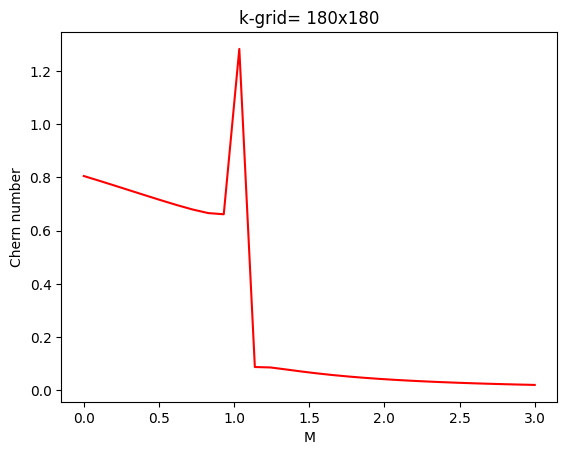

In [1]:
"""
Created on Mon Sep 25 15:53:49 2023
@author: yucheng
"""

import numpy as np
import math
from numpy import linalg as LA
import matplotlib.pyplot as plt
import time

start_time = time.time()

def pauli():
    # define puali matrices
    s_0=np.identity(2)
    s_z=np.array([[1,0],[0,-1]])
    s_x=np.array([[0,1],[1,0]])
    s_y=np.array([[0,-1j],[1j,0]])
    return s_0, s_x, s_y, s_z

## Build a function that takes in Hamiltonian and gives GS energy
def GS_E(H):
    eigen_val, eigen_vec = LA.eig(H)
    #  sorted enumerate produce (original index, value) in sorted order
    sorted_val = sorted(enumerate(eigen_val), key=lambda i: i[1])
    return sorted_val[0][1]

## Build a function that takes in Hamiltonian and gives excited state energy
def ES_E(H):
    eigen_val, eigen_vec = LA.eig(H)
    #  sorted enumerate produce (original index, value) in sorted order
    sorted_val = sorted(enumerate(eigen_val), key=lambda i: i[1])
    return sorted_val[1][1]

## Haldane model in momentum space
#  lattice constant and the nnn hopping phase is set to unity
def Haldane(k, M, t1, t2, phi):
    # nearest neighbor displacement
    e1 = np.array([0,1])
    e2 = 0.5*np.array([-1*3**0.5, -1])
    e3 = 0.5*np.array([3**0.5, -1])
    # next nearest neighbor displacement
    v1 = np.array([-1*3**0.5, 0])
    v2 = 0.5*np.array([3**0.5, -3])
    v3 = 0.5*np.array([3**0.5, 3])
    f0 = 2*t2*math.cos(phi)*(np.cos(np.dot(k, v1)) + np.cos(np.dot(k, v2)) + np.cos(np.dot(k, v3)))
    f1 = t1*(np.cos(np.dot(k,e1)) + np.cos(np.dot(k,e2)) + np.cos(np.dot(k,e3)))
    f2 = t1*(np.sin(np.dot(k,e1)) + np.sin(np.dot(k,e2)) + np.sin(np.dot(k,e3)))
    f3 = M - 2*t2*np.sin(phi)*(np.sin(np.dot(k,v1)) + np.sin(np.dot(k,v2)) + np.sin(np.dot(k,v3)))
    s_0, s_x, s_y, s_z = pauli()
    return s_0*f0 + s_x*f1 + s_y*f2 + s_z*f3

def f123(k, M, t1, t2, phi):
    # nearest neighbor displacement
    e1 = np.array([0,1])
    e2 = 0.5*np.array([-1*3**0.5, -1])
    e3 = 0.5*np.array([3**0.5, -1])
    # next nearest neighbor displacement
    v1 = np.array([-1*3**0.5, 0])
    v2 = 0.5*np.array([3**0.5, -3])
    v3 = 0.5*np.array([3**0.5, 3])
    f1 = t1*(np.cos(np.dot(k,e1)) + np.cos(np.dot(k,e2)) + np.cos(np.dot(k,e3)))
    f2 = t1*(np.sin(np.dot(k,e1)) + np.sin(np.dot(k,e2)) + np.sin(np.dot(k,e3)))
    f3 = M - 2*t2*np.sin(phi)*(np.sin(np.dot(k,v1)) + np.sin(np.dot(k,v2)) + np.sin(np.dot(k,v3)))
    return f1, f2, f3

def Chern(M, t1, t2, phi, kx_list, ky_list):
    dkx = kx_list[1] - kx_list[0]
    dky = ky_list[1] - ky_list[0]
    chern = 0
    for i in range(len(kx_list) - 1):  # -1 because we need to take kx_list[i+1] - kx_list[i]
        for j in range(len(ky_list) - 1):
            f1, f2, f3 = f123(np.array([kx_list[i], ky_list[j]]), M, t1, t2, phi)
            # f1_xa = the advanced f1 along kx direction = the f1 value on the (i+1)-th kx grid
            f1_xa, f2_xa, f3_xa = f123(np.array([kx_list[i+1], ky_list[j]]), M, t1, t2, phi)
            f1_ya, f2_ya, f3_ya = f123(np.array([kx_list[i], ky_list[j+1]]), M, t1, t2, phi)
            # calculate derivatives
            pf1pkx = (f1_xa - f1) / dkx
            pf2pkx = (f2_xa - f2) / dkx
            pf3pkx = (f3_xa - f3) / dkx
            pf1pky = (f1_ya - f1) / dky
            pf2pky = (f2_ya - f2) / dky
            pf3pky = (f3_ya - f3) / dky
            # first calculate each component of the cross product
            corss_x = pf2pkx * pf3pky - pf3pkx * pf2pky
            corss_y = pf3pkx * pf1pky - pf1pkx * pf3pky
            corss_z = pf1pkx * pf2pky - pf2pkx * pf1pky
            chern += (f1*corss_x + f2*corss_y + f3*corss_z) / (f1**2+f2**2+f3**2)**1.5
    return chern * dkx * dky / (4*np.pi)

## Set Haldane parameters
t1, t2, phi = 1, 0.2, np.pi*0.5
kx_list = np.linspace(0, np.pi, 180)  # integrate over rectangle instead of parrallelogram BZ
ky_list = np.linspace(0, 2*np.pi / 3**0.5, 180)
M_list = np.linspace(0, 3, num=30)
chern_list = []
for M in M_list:
    chern_list.append(Chern(M, t1, t2, phi, kx_list, ky_list))

chern_list = np.array(chern_list)
plt.plot(M_list, chern_list, 'r')
print('k-grid= '+str(len(kx_list))+'x'+str(len(ky_list)))
print("--- %s seconds ---" % (time.time() - start_time))
plt.title('k-grid= '+str(len(kx_list))+'x'+str(len(ky_list)))
plt.xlabel('M')
plt.ylabel('Chern number')

## Alternative methods

1. Analytic differentiation
2. Python differentitation package
3. Fukui's $U(1)$ link variable method

All the above methods could be written in the general $\mathcal{H}(\textbf{k})$ way.

### Fukui's method



I used Fukui's method to calculate the phase diagram in Haldane's original paper.

They agree well.

However, in Haldane's paper, it said
- for $t_2>0$, one will get $\nu=-1$ on the left and $\nu=+1$ on the right
- for $t_2<0$, the sign reverse

but my result has the opposite:
- for $t_2>0$, I get $\nu=+1$ on the left and $\nu=-1$ on the right
- for $t_2<0$, the sign reverse

-0.9999999999999999
phi_index=  0
phi_index=  1
phi_index=  2
phi_index=  3
phi_index=  4
phi_index=  5
phi_index=  6
phi_index=  7
phi_index=  8
phi_index=  9
phi_index=  10
phi_index=  11
phi_index=  12
phi_index=  13
phi_index=  14
phi_index=  15
phi_index=  16
phi_index=  17
phi_index=  18
phi_index=  19
phi_index=  20
phi_index=  21
phi_index=  22
phi_index=  23
phi_index=  24
phi_index=  25
phi_index=  26
phi_index=  27
phi_index=  28
phi_index=  29


<ipython-input-1-4630e673f987>:105: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, ticks=np.linspace(zmin, zmax, 3))


Text(0, 0.5, 'M/ t2')

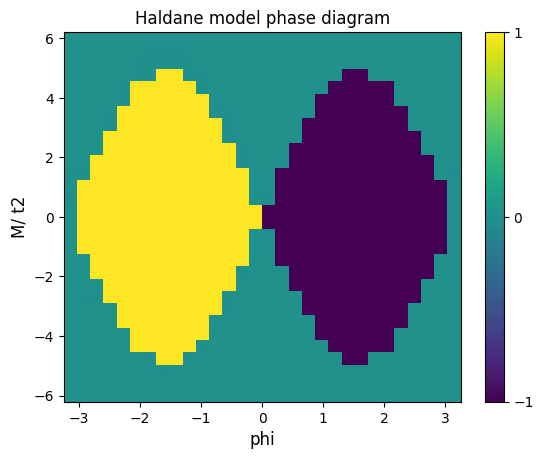

In [1]:
"""
Created on Thu Sep 28 14:34:46 2023
@author: yucheng
"""

import numpy as np
import math
from numpy import linalg as LA
import matplotlib.pyplot as plt
import matplotlib as mpl

## Set Haldane model parameters
M, t1, t2, phi = 0.7, 1, 1, np.pi*0.5

## Set k-grid parameters
#  number of grids on reciprocal lattice vectors
num_b1 = 10
num_b2 = 10
# Reciprocal lattice vectors when real-space A,B sub-lattice distance=1 (lattice constant set to unity)
b1 = 4*np.pi/3 * np.array([3**0.5/2, -1/2])
b2 = np.array([0, 4*np.pi/3])
vec_1 = b1 / num_b1
vec_2 = b2 / num_b2


## build a function that takes in Hamiltonian and gives GS
def GS_vec(H):
    eigen_val, eigen_vec = LA.eig(H)
    #  sorted enumerate produce (original index, value) in sorted order
    sorted_val = sorted(enumerate(eigen_val), key=lambda i: i[1])
    return eigen_vec.T[sorted_val[0][0]]  #LA.eig returns eigenvectors in column

def pauli():
    # define puali matrices
    s_0=np.identity(2)
    s_z=np.array([[1,0],[0,-1]])
    s_x=np.array([[0,1],[1,0]])
    s_y=np.array([[0,-1j],[1j,0]])
    return s_0, s_x, s_y, s_z

## Haldane model in momentum space
#  lattice constant is set to unity, k=[kx, ky]
def Haldane(k, M, t1, t2, phi):
    # nearest neighbor displacement
    e1 = np.array([0,1])
    e2 = 0.5*np.array([-1*3**0.5, -1])
    e3 = 0.5*np.array([3**0.5, -1])
    # next nearest neighbor displacement
    v1 = np.array([-1*3**0.5, 0])
    v2 = 0.5*np.array([3**0.5, -3])
    v3 = 0.5*np.array([3**0.5, 3])
    f0 = 2*t2*math.cos(phi)*(np.cos(np.dot(k, v1)) + np.cos(np.dot(k, v2)) + np.cos(np.dot(k, v3)))
    f1 = t1*(np.cos(np.dot(k,e1)) + np.cos(np.dot(k,e2)) + np.cos(np.dot(k,e3)))
    f2 = t1*(np.sin(np.dot(k,e1)) + np.sin(np.dot(k,e2)) + np.sin(np.dot(k,e3)))
    f3 = M - 2*t2*np.sin(phi)*(np.sin(np.dot(k,v1)) + np.sin(np.dot(k,v2)) + np.sin(np.dot(k,v3)))
    s_0, s_x, s_y, s_z = pauli()
    return s_0*f0 + s_x*f1 + s_y*f2 + s_z*f3

## U(1) link variable Eq.(7) in [Fukui, 2005]
#  I write this first for 2x2 Hamiltonian -> only the lowwer band Chern number is needed
def U(mu, k_l):  # mu, k_l=[kx, ky]
    n_kl = GS_vec(Haldane(k_l, M, t1, t2, phi))
    n_klmu = GS_vec(Haldane(k_l + mu, M, t1, t2, phi))
    N_mukl = abs(np.dot(n_kl.conj(), n_klmu))
    return np.dot(n_kl.conj(), n_klmu) / N_mukl

def F_tilde_12(k_l):
    U_1kl = U(vec_1, k_l)
    U_2kl1 = U(vec_2, k_l + vec_1)
    U_1kl2 = U(vec_1, k_l + vec_2)
    U_2kl = U(vec_2, k_l)
    return np.log(U_1kl * U_2kl1 / (U_1kl2 * U_2kl))

def Chern():
    chern = 0
    for i in range(num_b1):
        for j in range(num_b2):
            chern += F_tilde_12(i*vec_1 + j*vec_2)
    return np.real(chern / (2*np.pi*1j))

print(Chern())

## Plot setting
M_list = np.linspace(-6, 6, num=30)
phi_list = np.linspace(-np.pi, np.pi, num=30)
grid_x, grid_y = np.meshgrid(phi_list, M_list)  #np.meshgrid(x_grid_1d, y_grid_1d) gives correct 2D grid for x,y
Chern_grid = np.zeros((len(phi_list), len(M_list)))  #np.zeros(y,x) gives y times x matrix
for i in range(len(phi_list)):
    print('phi_index= ', i)
    for j in range(len(M_list)):
        phi, M = phi_list[i], M_list[j]
        Chern_grid[j][i] = Chern()

cmap = plt.get_cmap('viridis')
zmin = -1
zmax = 1
norm = mpl.colors.Normalize(vmin=zmin, vmax=zmax)

fig, ax0 = plt.subplots(nrows=1)
im = ax0.pcolormesh(grid_x, grid_y, Chern_grid, cmap=cmap, norm=norm)
## Create colorbar
#  creating ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.linspace(zmin, zmax, 3))
## Title
ax0.set_title('Haldane model phase diagram')
plt.xlabel('phi', fontsize=12)
plt.ylabel('M/ t2', fontsize=12)